In [1]:
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from azure.storage.blob import BlobServiceClient

In [2]:
from src.paychex_ml.utils import load_credentials
from src.paychex_ml.ts_diagnosis import stationarity_test
from src.paychex_ml.ts_diagnosis import autocorrelation_test
from src.paychex_ml.ts_diagnosis import get_trend

In [1]:
from src.paychex_ml.ts_diagnosis import print_var

In [3]:
credentials = load_credentials("blob_storage",
                               file="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/credentials.yml")

In [4]:
# Start client
container_name = "clean-data"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [5]:
# Download file
file = 'paychex_revenue.parquet'
stream_downloader = container_client.download_blob(file)
stream = BytesIO()
stream_downloader.readinto(stream)

46014

In [6]:
df = pd.read_parquet(stream, engine='pyarrow')
df['Calendar Date'] = pd.PeriodIndex(df['Calendar Date'], freq='M')
df = df.set_index('Calendar Date')
df_month = pd.concat([df[df['Scenario']=='Actual'],
                      df[(df['Scenario']=='Forecast')&(df['Version']=='8+4')&(df.index<'2022-04')]
                      ])
#df_month = df_month.select_dtypes(include=np.number)

In [7]:
df_month

,Scenario,Version,Fiscal Period,11 Payroll Blended Products,12 W2 Revenue,13 Delivery Revenue,14 ASO Allocation,15 Other Processing Revenue,16 SurePayroll,17 Total International,...,51 Total Paychex Advance,52 Full Service Unemployment Revenue,53 ESR Revenue,54 Cafeteria,55 Benetrac,56 Emerging Products,60 Total PEO,71 Workers Comp - Payment Services,72 Health Benefits,80 Interest on Funds Held for Clients
Calendar Date,,,,,,,,,,,,,,,,,,,,,
2014-06,Actual,Final Revised,FY1501,99633512.0,7031234.09,7393351.97,7255027.55,4765775.19,3246967.02,808003.64,...,0.0,1869396.0,47601.0,1714950.0,1922941.0,796066.0,12948698.0,5225672.0,4858397.0,3308153.0
2014-07,Actual,Final Revised,FY1502,121619696.0,7325377.82,13513741.18,9070820.80,6502729.54,3362473.02,855305.18,...,0.0,2341533.0,67520.0,1698493.0,1916578.0,986957.0,14670280.0,5108935.0,5244319.0,3466374.0
2014-08,Actual,Final Revised,FY1503,99472483.0,7443620.46,7286966.62,7489159.50,4215268.17,3286111.93,801651.38,...,0.0,1986835.0,79771.0,1829119.0,1944829.0,924688.0,14606683.0,5380160.0,5588578.0,3434418.0
2014-09,Actual,Final Revised,FY1504,94198230.0,7414842.11,7081861.96,7011292.24,4726806.24,3345328.53,834334.16,...,0.0,1888067.0,105330.0,1710601.0,1933042.0,732445.0,14456324.0,6281391.0,4968759.0,3419918.0
2014-10,Actual,Final Revised,FY1505,124353873.0,7818212.35,13741077.44,9372927.59,6514037.07,3402641.78,869205.85,...,0.0,2491011.0,143956.0,1702223.0,1956820.0,1051918.0,14544807.0,6107474.0,5752070.0,3472038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11,Forecast,8+4,FY2206,117503730.0,155279.24,7617424.02,18200667.03,9402313.19,8070593.59,4468419.01,...,7614146.0,3708846.0,1612427.0,1621397.0,1563705.0,4695291.0,68898426.0,9356769.0,6207581.0,4723736.0
2021-12,Forecast,8+4,FY2207,127800869.0,192584.15,8212787.33,19189993.34,15988997.51,13553160.66,5355183.42,...,9863306.0,3985769.0,3983709.0,1647632.0,1500245.0,4913493.0,76848324.0,9372925.0,8091726.0,4927517.0
2022-01,Forecast,8+4,FY2208,103869768.0,81544421.44,22435519.84,17242037.23,20866313.40,7943756.66,5022326.69,...,6906691.0,3503156.0,4249130.0,1611912.0,1492592.0,5438292.0,96241778.0,9465158.0,5645056.0,4865483.0


In [8]:
df_month.resample('Y').sum()/1000000

,11 Payroll Blended Products,12 W2 Revenue,13 Delivery Revenue,14 ASO Allocation,15 Other Processing Revenue,16 SurePayroll,17 Total International,20 Total 401k,31 HR Solutions (excl PEO),32 ASO Revenue - Oasis,...,51 Total Paychex Advance,52 Full Service Unemployment Revenue,53 ESR Revenue,54 Cafeteria,55 Benetrac,56 Emerging Products,60 Total PEO,71 Workers Comp - Payment Services,72 Health Benefits,80 Interest on Funds Held for Clients
Calendar Date,,,,,,,,,,,,,,,,,,,,,
2014,737.428125,52.693338,63.836021,55.046597,36.423927,23.492733,5.780052,115.599428,158.943352,0.000000,...,0.000000,14.632019,0.858578,12.180632,13.684252,6.310446,99.773574,39.007853,37.075734,24.121068
2015,1298.613489,93.593798,119.981656,102.871770,68.040582,44.321295,8.979380,195.885178,299.015634,0.000000,...,0.000000,28.668887,18.537087,20.713126,24.294082,12.197437,216.680787,69.784067,69.368606,43.845111
2016,1335.478785,40.203457,122.281340,113.286032,71.661903,50.509859,9.912922,198.254828,332.497428,0.000000,...,43.212226,32.207550,39.785961,20.706727,19.904694,14.178895,252.302113,75.894340,74.055770,47.973685
2017,1322.841738,93.712437,123.399251,118.558721,71.155219,59.318948,11.158371,217.891596,351.252019,0.000000,...,48.603195,33.726132,45.291374,21.334534,20.838701,15.951703,308.638873,82.641675,90.684305,56.979107
2018,1321.713907,97.793304,122.857733,133.743102,70.998695,63.527947,33.012195,238.451000,391.704221,0.002442,...,49.831955,35.529565,45.737804,21.133937,18.988027,18.495847,444.022913,90.838891,93.902514,73.044038
2019,1333.110629,93.606582,122.103483,151.859886,74.567814,71.998797,43.524187,253.132976,440.011888,8.126486,...,54.661853,37.937200,46.318042,21.016444,18.495660,23.018538,833.548566,99.038369,88.312594,84.877249
2020,1250.775892,90.319811,113.258838,158.040563,67.655937,80.253149,46.131017,266.747413,456.132428,6.428332,...,50.124070,38.287514,47.240780,20.732848,17.356750,37.455996,784.951344,101.879337,80.111996,73.709565
2021,1322.054732,82.270613,117.833456,195.256259,97.442273,93.104550,54.305304,294.885511,558.070252,3.262130,...,77.452019,42.226419,49.635538,19.870733,16.956393,57.461266,852.147610,114.367969,77.806384,58.011263
2022,323.942494,81.588992,36.676107,53.818540,47.658126,23.465937,14.063420,76.504021,153.020728,0.757929,...,19.778460,10.486108,21.252319,4.883763,4.610203,15.223559,254.032017,30.699107,18.812882,14.267935


# General Stationary Test & ACR

11 Payroll Blended Products
-----------------------------------------------------------
12 W2 Revenue


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
13 Delivery Revenue
-----------------------------------------------------------
14 ASO Allocation


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warning

-----------------------------------------------------------
15 Other Processing Revenue
-----------------------------------------------------------
16 SurePayroll


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
17 Total International


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
20 Total 401k
-----------------------------------------------------------
31 HR Solutions (excl PEO)


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\DataspellProjects\Paychex_revenue_forecast\src\paychex_ml\ts_diagnosis.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, s

-----------------------------------------------------------
32 ASO Revenue - Oasis
-----------------------------------------------------------
41 HR Online


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
42 Time Attendance
-----------------------------------------------------------
51 Total Paychex Advance


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
52 Full Service Unemployment Revenue


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
53 ESR Revenue
-----------------------------------------------------------
54 Cafeteria


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
55 Benetrac
-----------------------------------------------------------
56 Emerging Products


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
60 Total PEO
-----------------------------------------------------------
71 Workers Comp - Payment Services


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


-----------------------------------------------------------
72 Health Benefits
-----------------------------------------------------------
80 Interest on Funds Held for Clients


C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


-----------------------------------------------------------


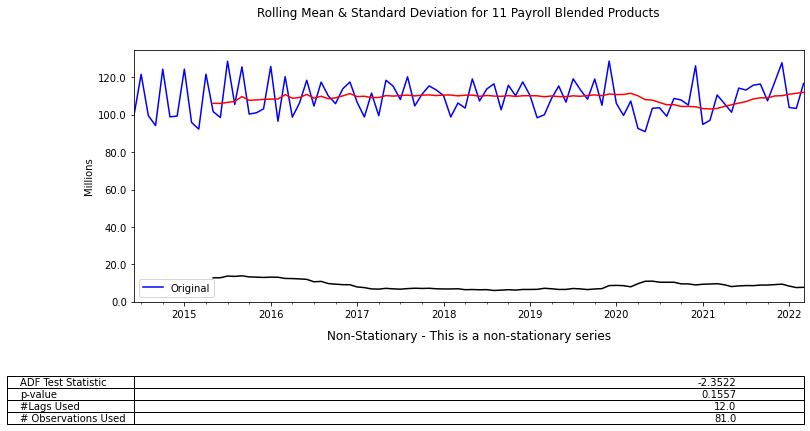

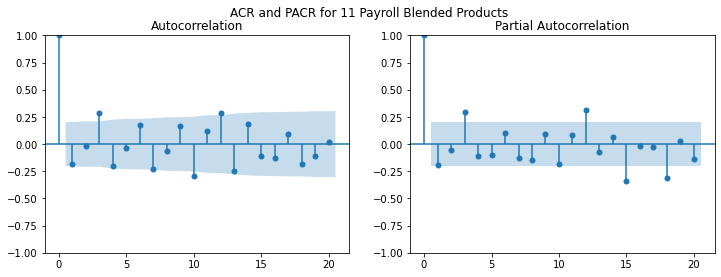

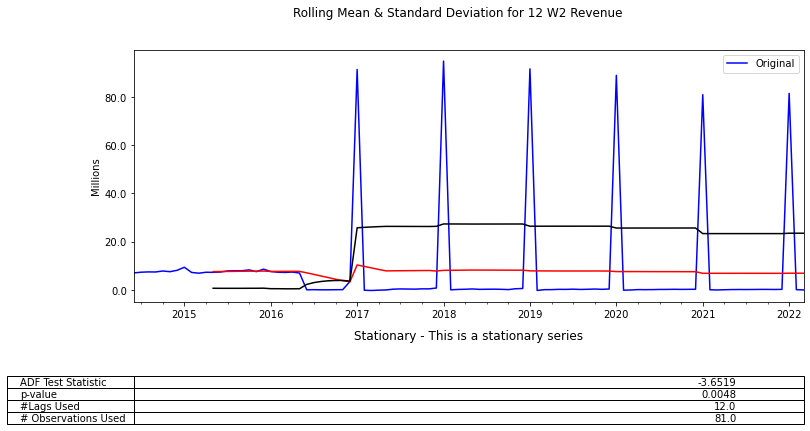

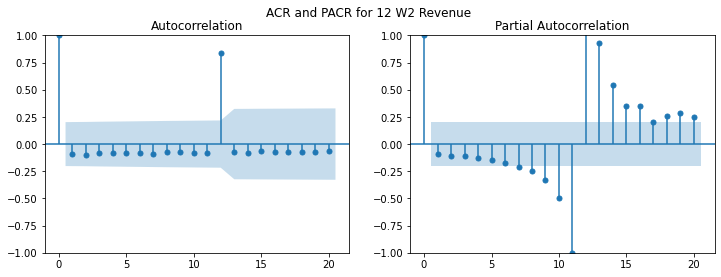

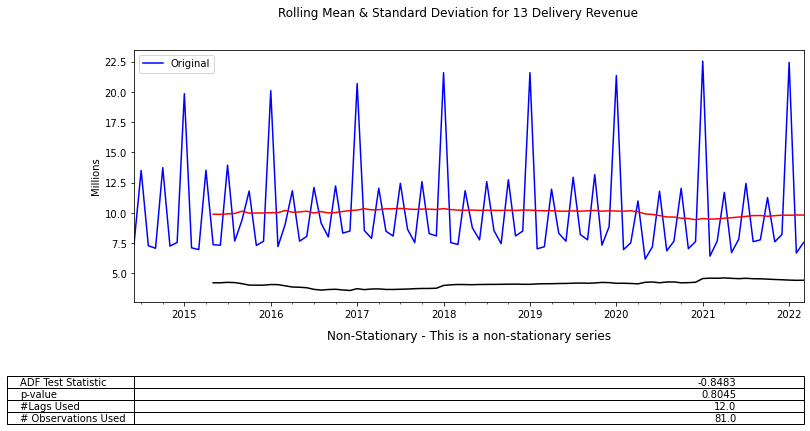

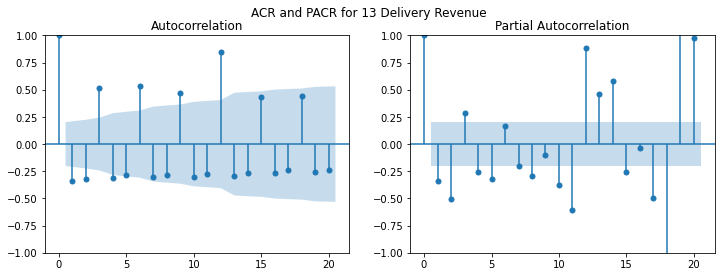

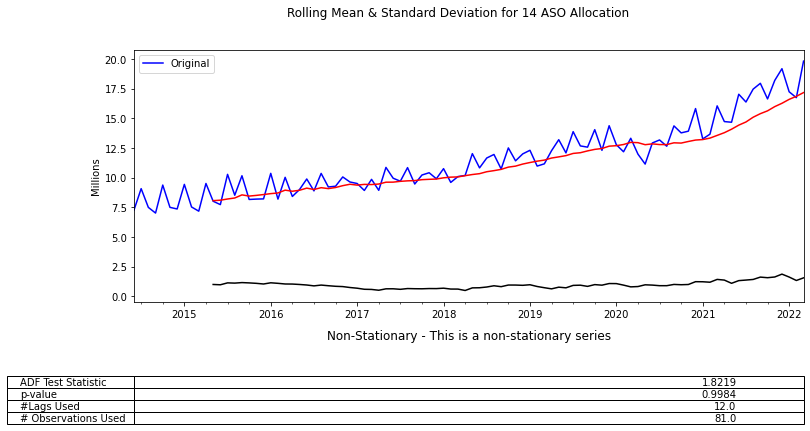

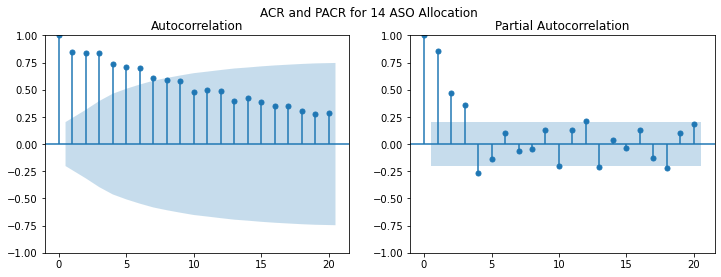

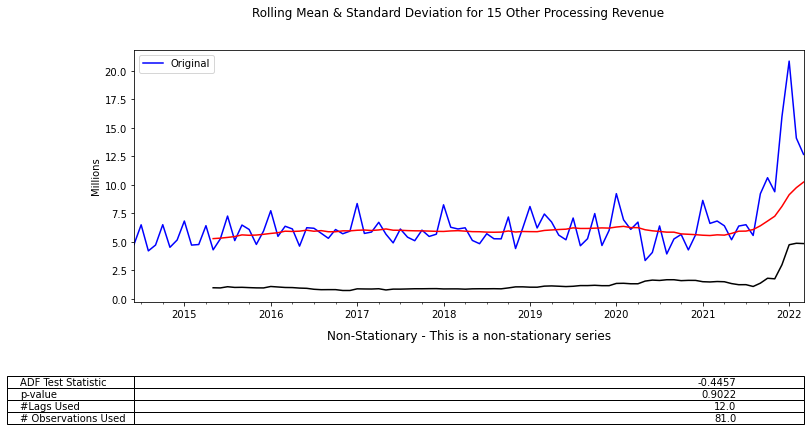

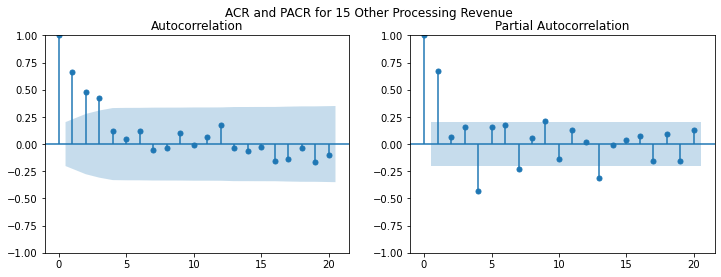

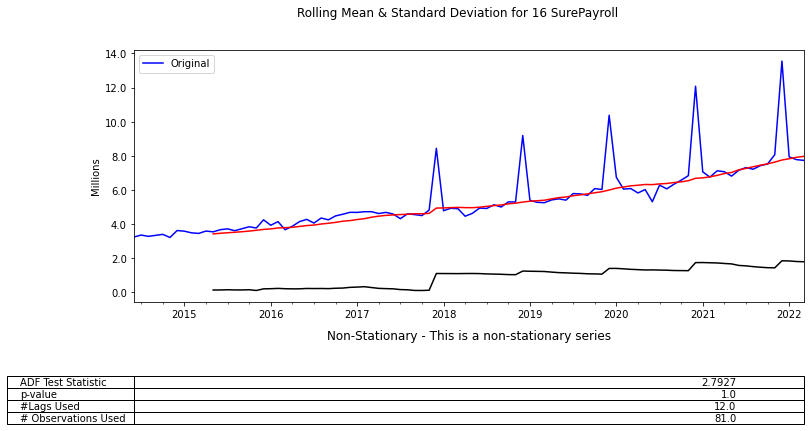

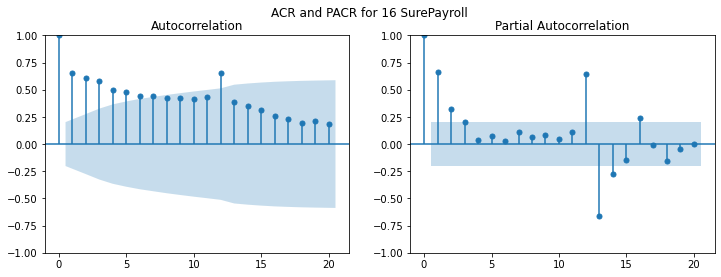

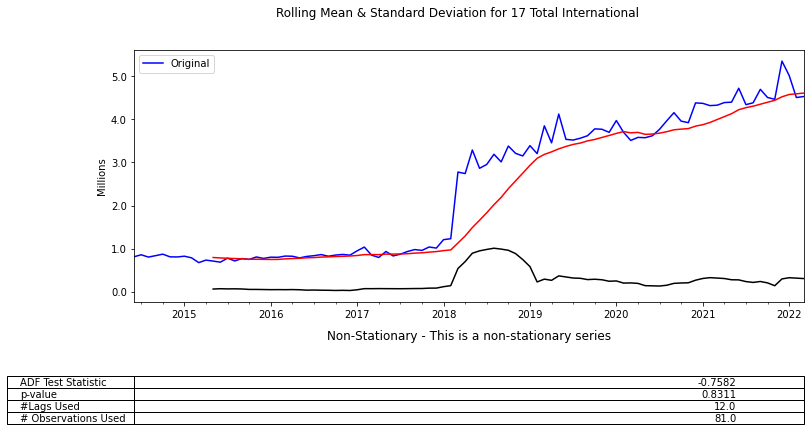

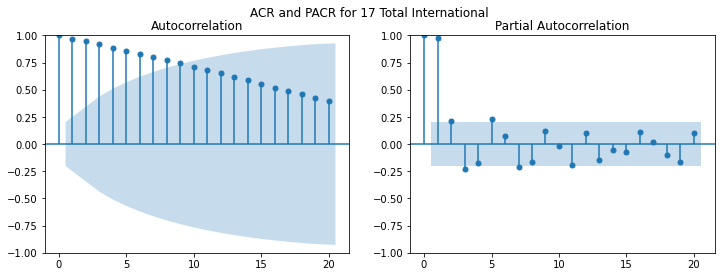

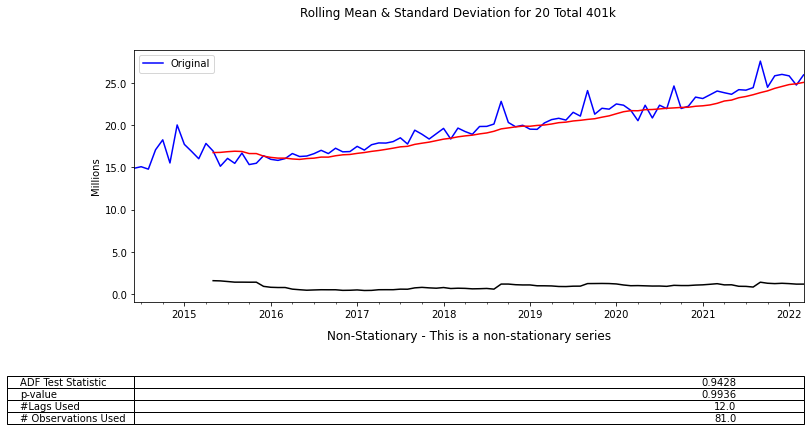

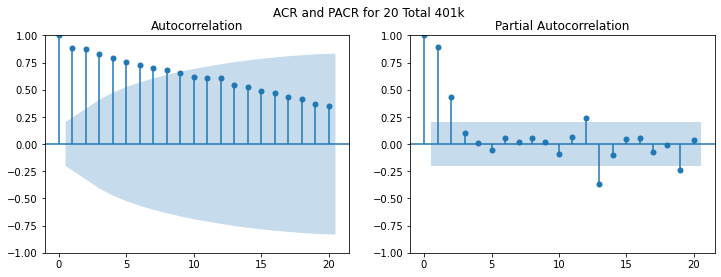

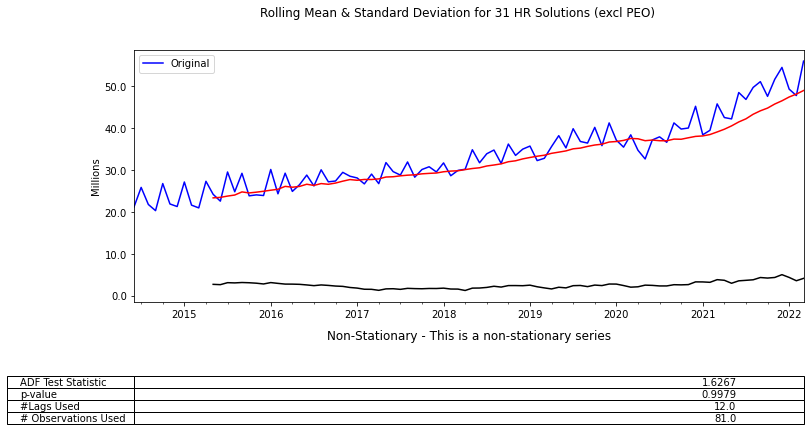

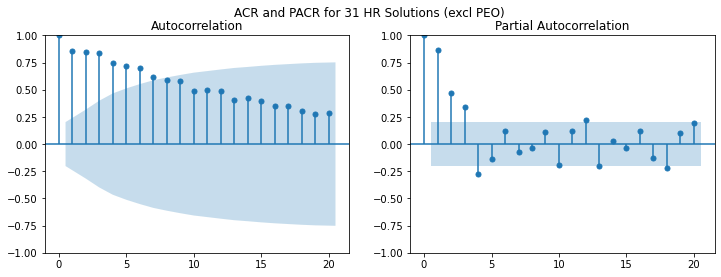

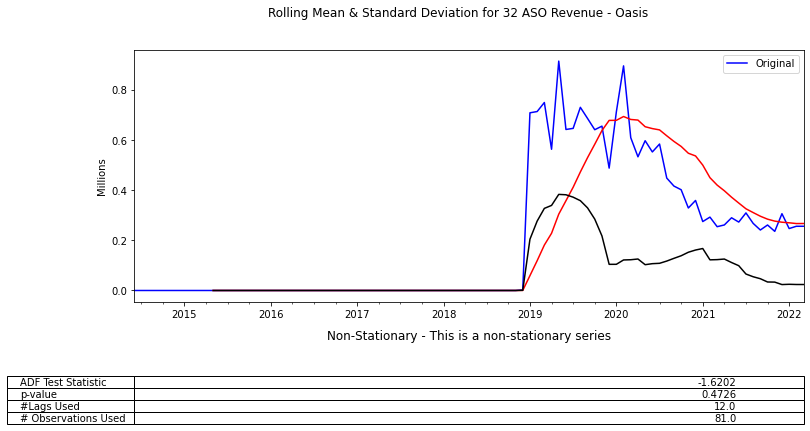

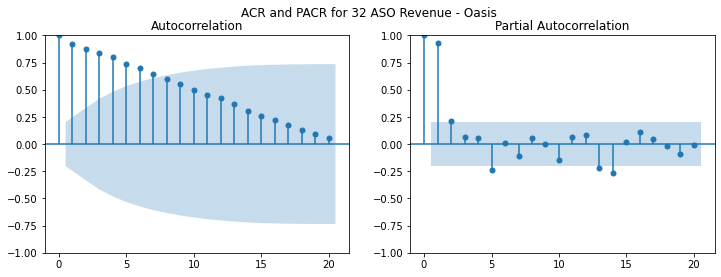

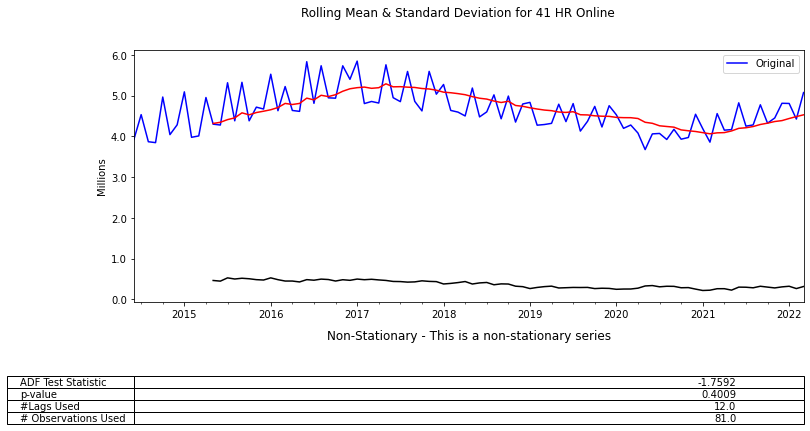

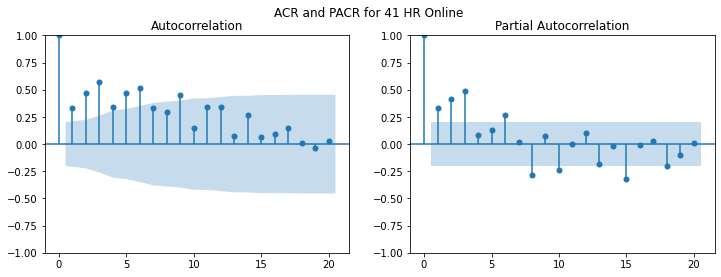

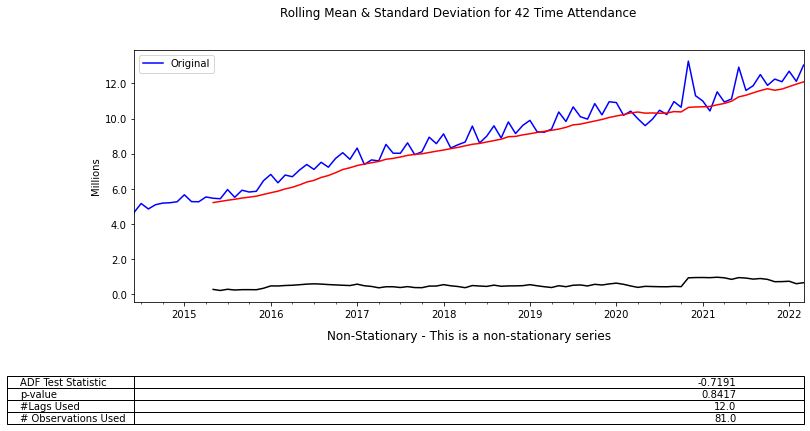

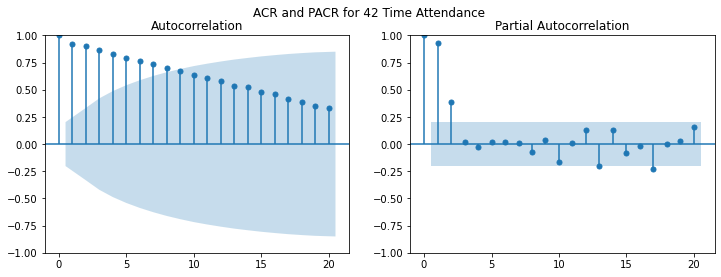

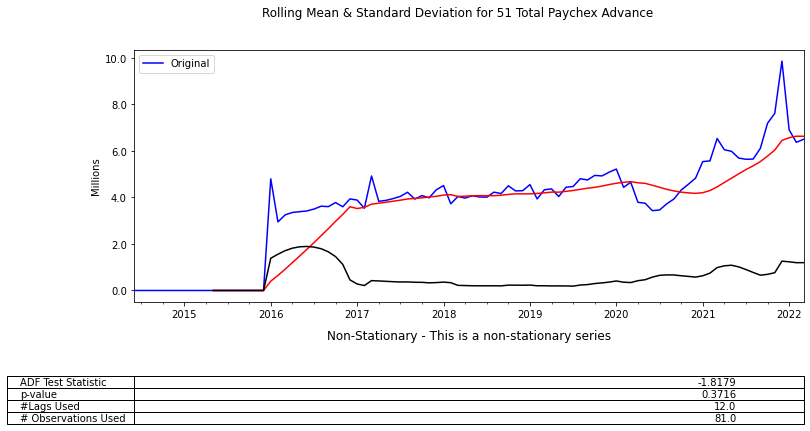

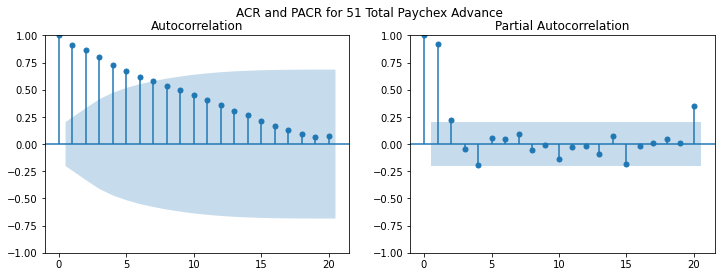

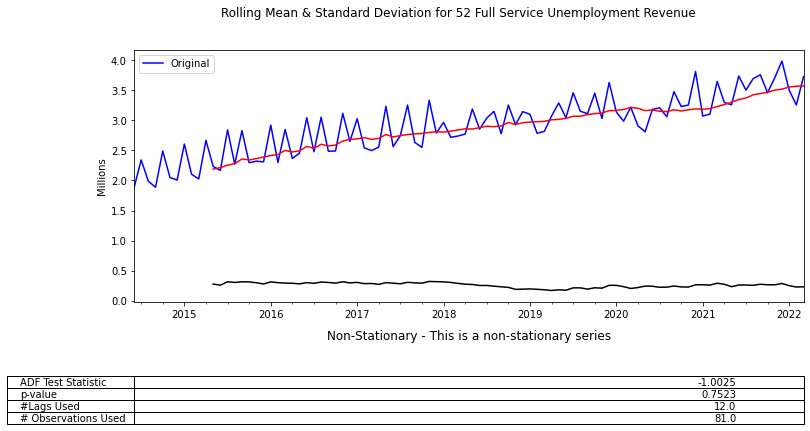

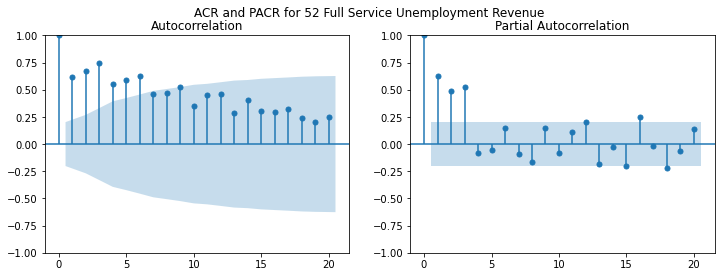

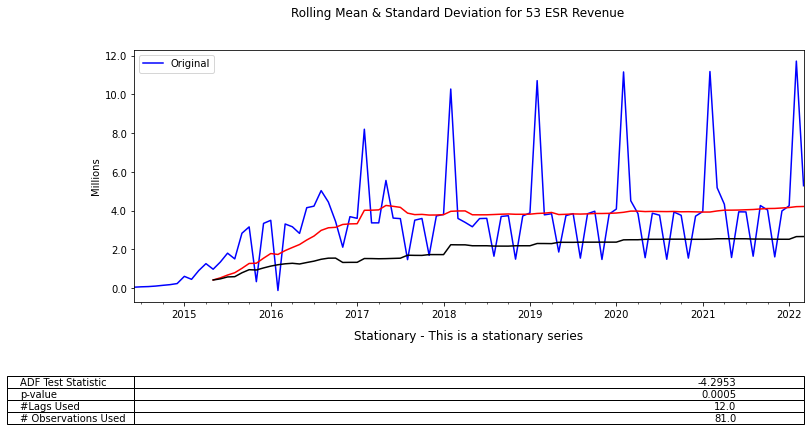

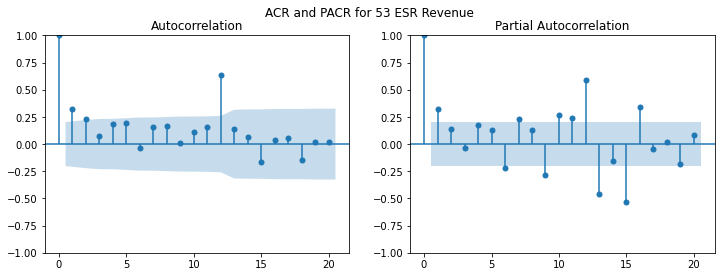

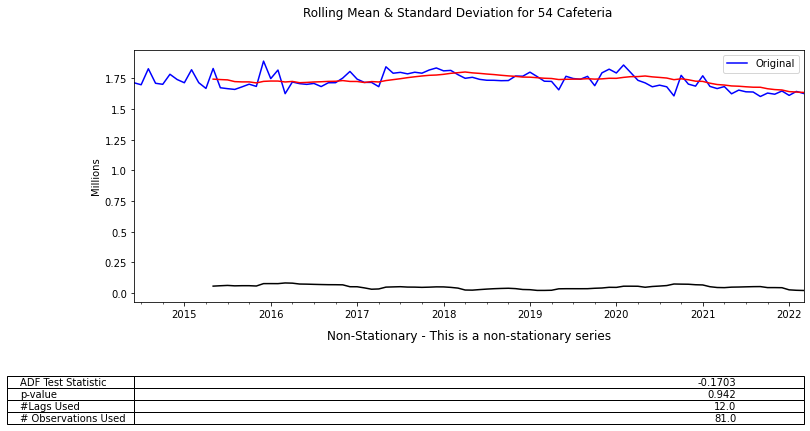

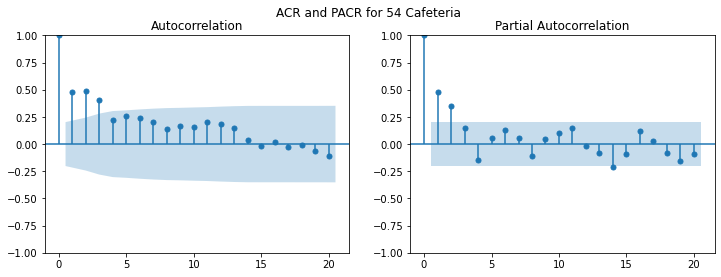

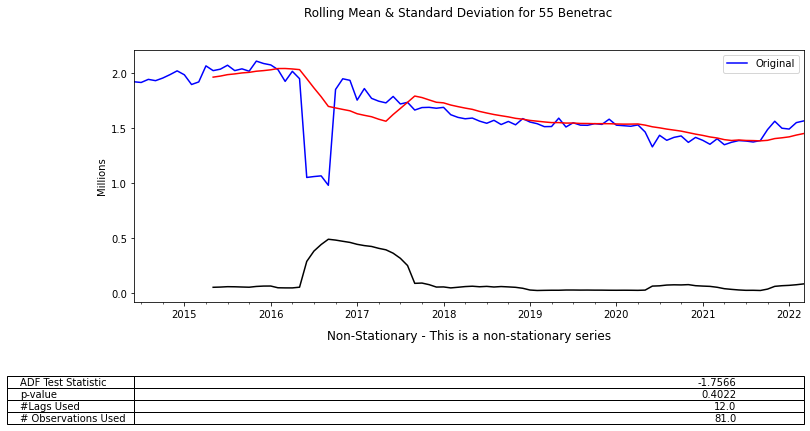

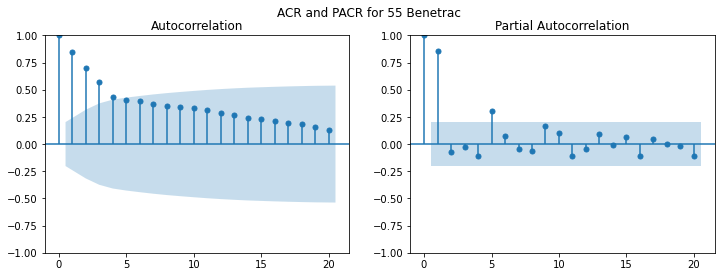

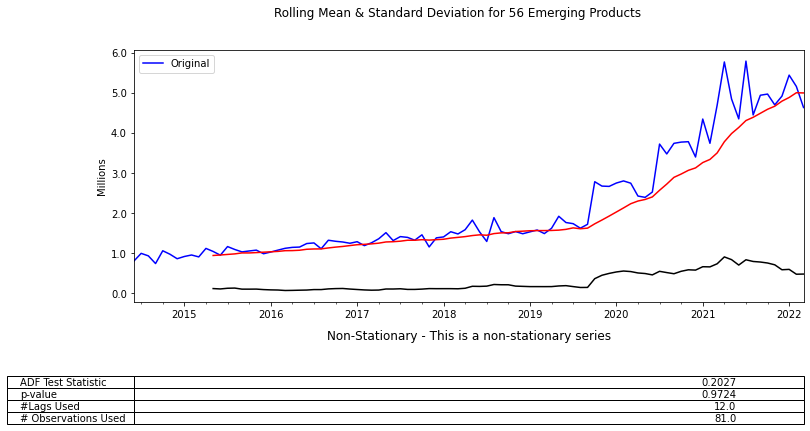

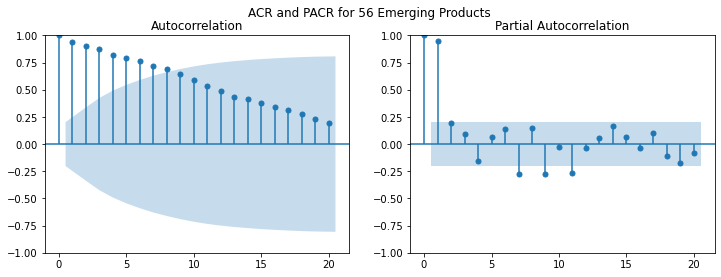

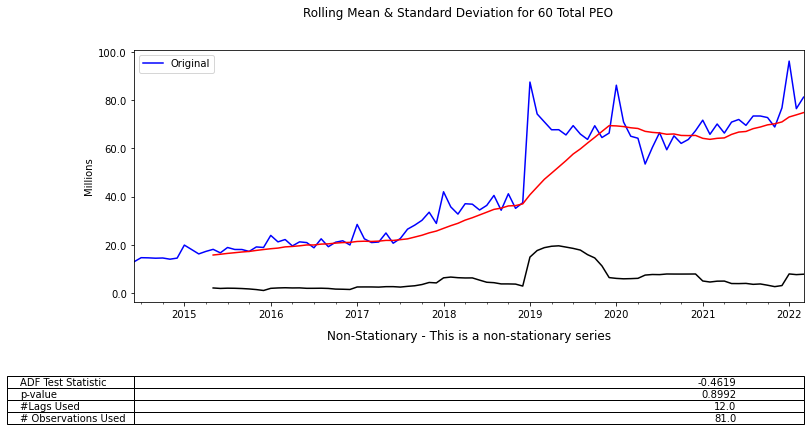

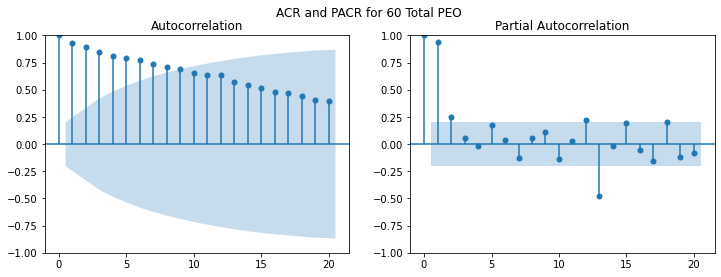

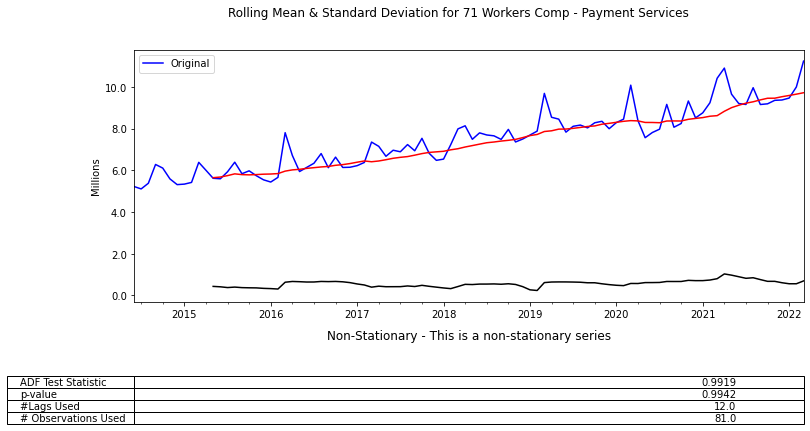

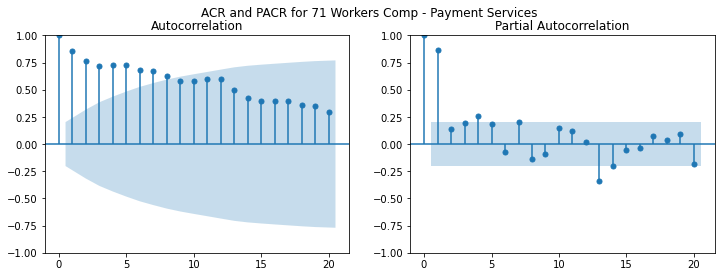

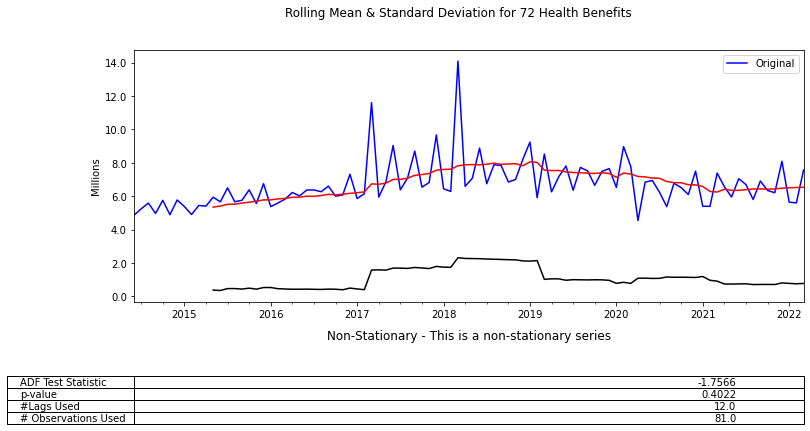

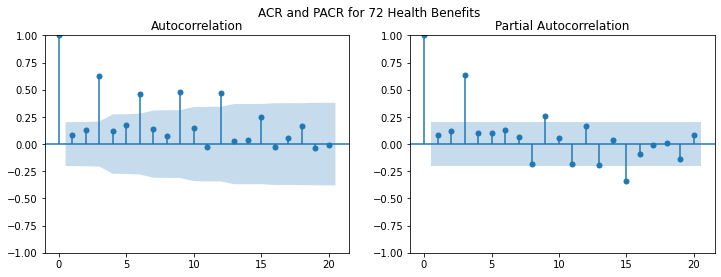

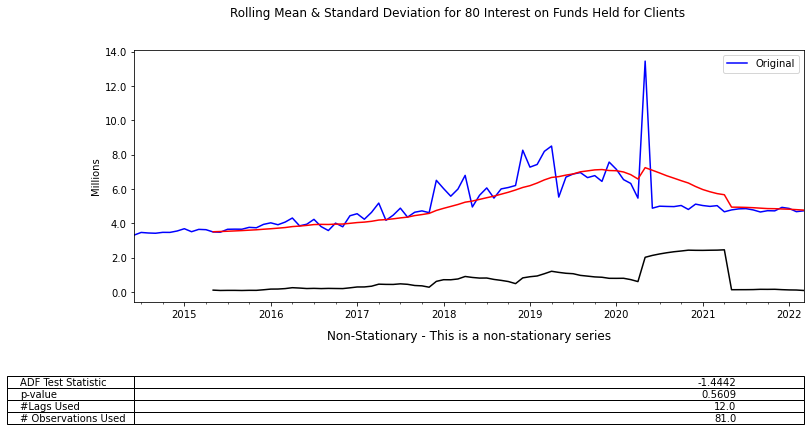

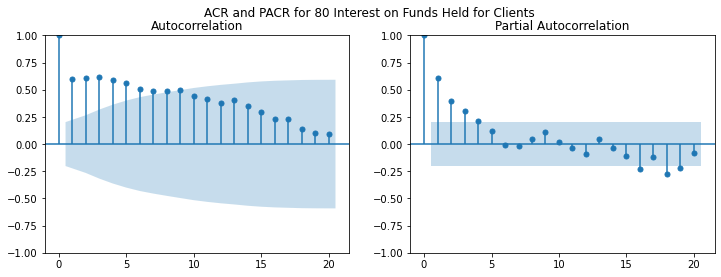

In [35]:
for c in df_month.select_dtypes(include=np.number).columns:
    print (c)
    fig = stationarity_test(df_month[c], maxlag=12, autolag=None)
    fig = autocorrelation_test(df_month[c])
    print("-----------------------------------------------------------")

# Item analysis

## 12W2

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


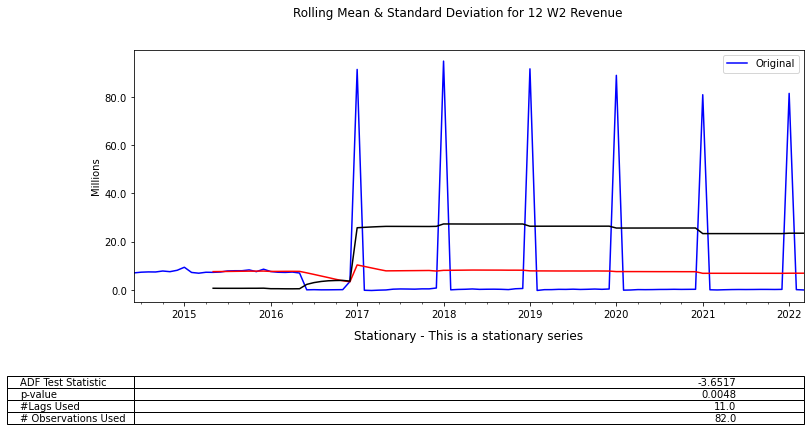

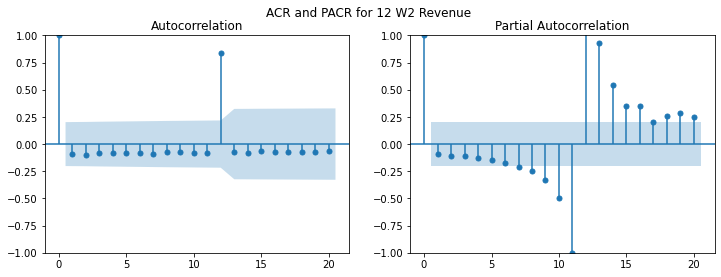

In [21]:
fig = stationarity_test(df_month['12 W2 Revenue'])
fig = autocorrelation_test(df_month['12 W2 Revenue'])

We filter data from 2017, when the seasonality starts.

In [17]:
df_12 = df_month.loc[df_month.index.year  >= 2017, '12 W2 Revenue']

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


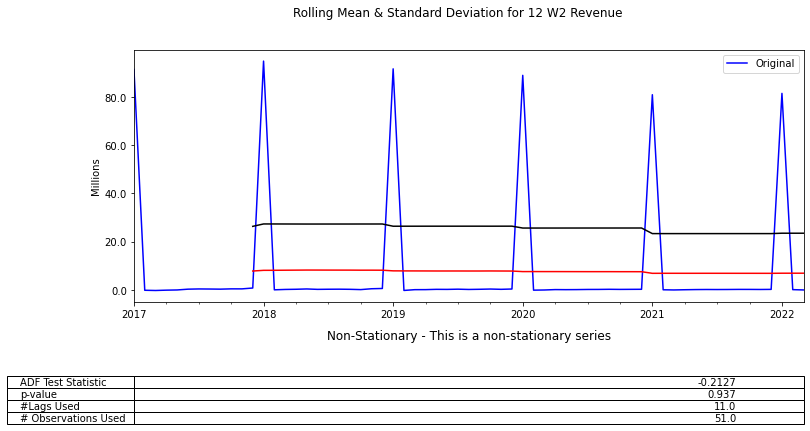

In [18]:
fig = stationarity_test(df_12)

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


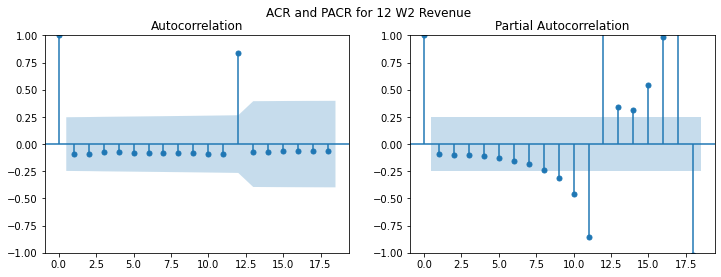

In [20]:
fig = autocorrelation_test(df_12)

## 16 Sure Payrol

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


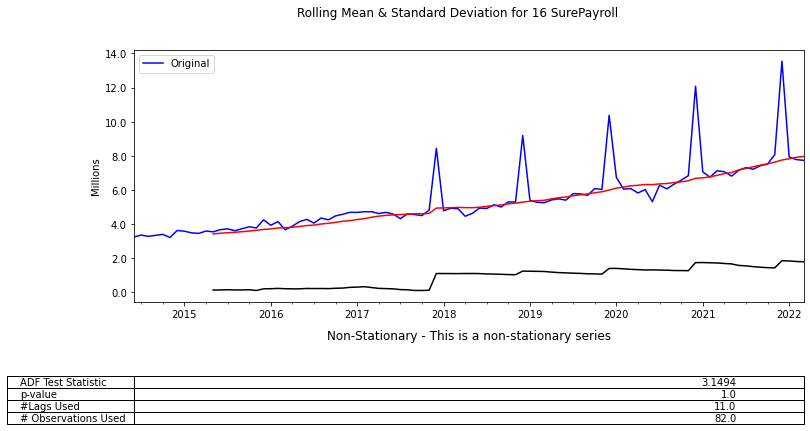

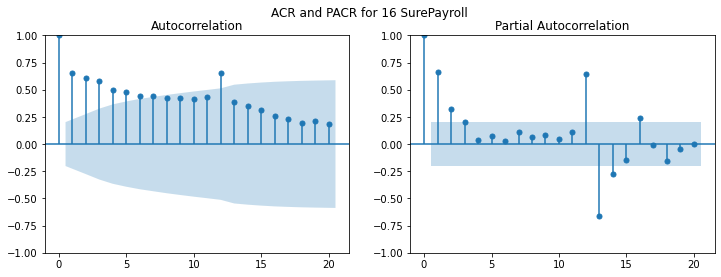

In [22]:
fig = stationarity_test(df_month['16 SurePayroll'])
fig = autocorrelation_test(df_month['16 SurePayroll'])

In [24]:
df_16 = df_month.loc[df_month.index.year  >= 2018, '16 SurePayroll']

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


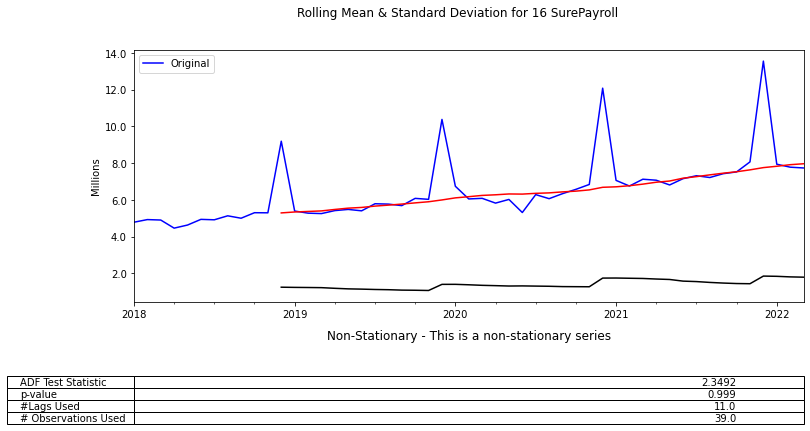

In [25]:
fig = stationarity_test(df_16)

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


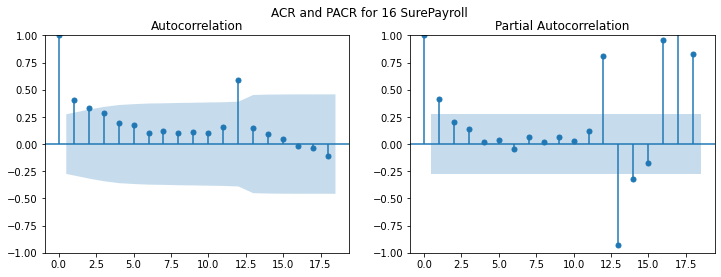

In [26]:
fig = autocorrelation_test(df_16)

## 17

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


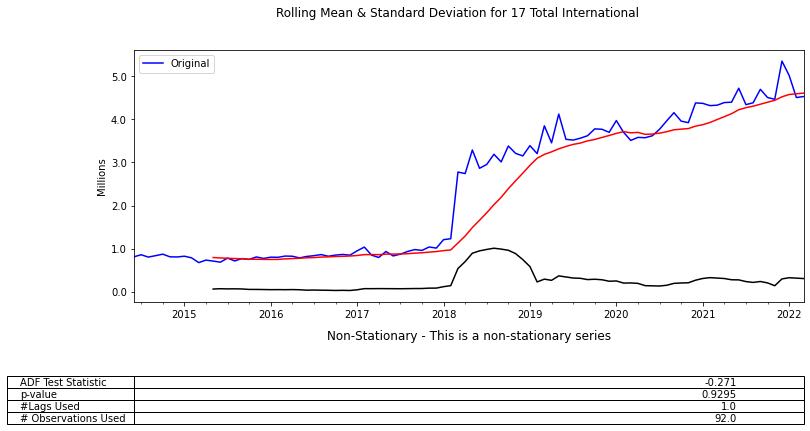

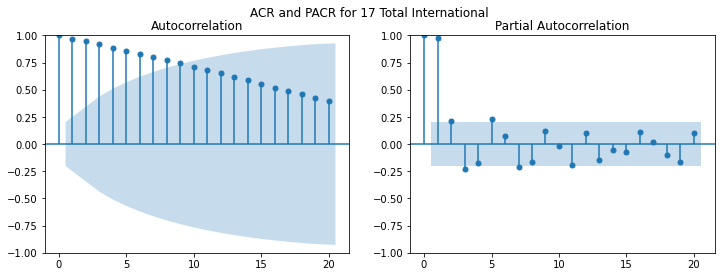

In [27]:
fig = stationarity_test(df_month['17 Total International'])
fig = autocorrelation_test(df_month['17 Total International'])

In [28]:
df_17 = df_month.loc[df_month.index.year  >= 2018, '17 Total International']

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


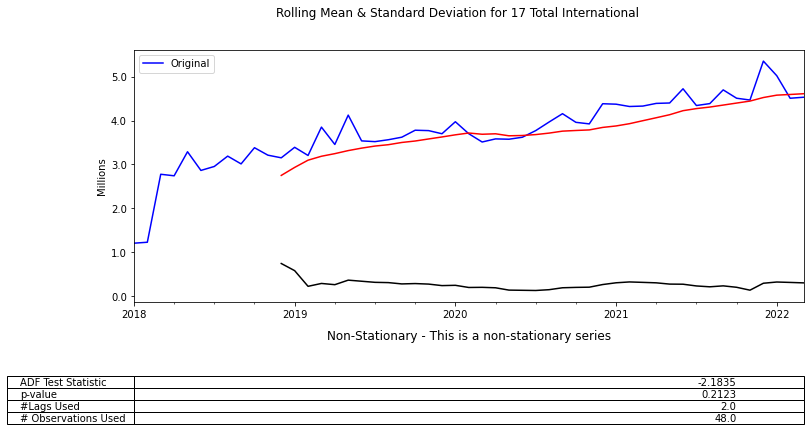

In [29]:
fig = stationarity_test(df_17)

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


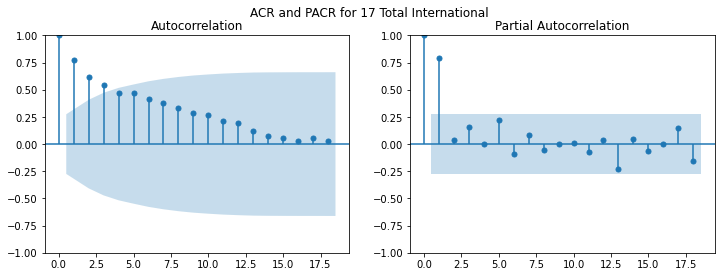

In [30]:
fig = autocorrelation_test(df_17)

## Remove trend with linear regression

In [181]:
# Start client
container_name = "external-data"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [182]:
# Download file
file = 'unemployment_rate.parquet'
stream_downloader = container_client.download_blob(file)
stream = BytesIO()
stream_downloader.readinto(stream)

3475

In [188]:
ts_unemp = pd.read_parquet(stream, engine='pyarrow')
ts_unemp['date'] = pd.to_datetime(ts_unemp['date'], format="%Y%m%d").dt.to_period('M')
ts_unemp = ts_unemp.set_index('date').value

In [189]:
ts_unemp

date
2022-02    3.8
2022-01    4.0
2021-12    3.9
2021-11    4.2
2021-10    4.6
          ... 
2015-05    5.6
2015-04    5.4
2015-03    5.4
2015-02    5.5
2015-01    5.7
Freq: M, Name: value, Length: 86, dtype: float64

In [190]:
ts = df_month['14 ASO Allocation']

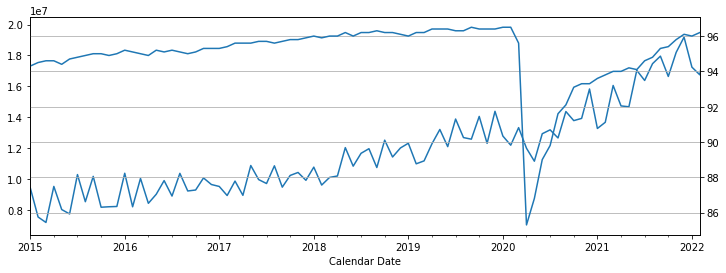

In [203]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()
ts.plot(ax=ax1)
(100-ts_unemp).plot(ax=ax2)
plt.grid(True, axis='y')

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


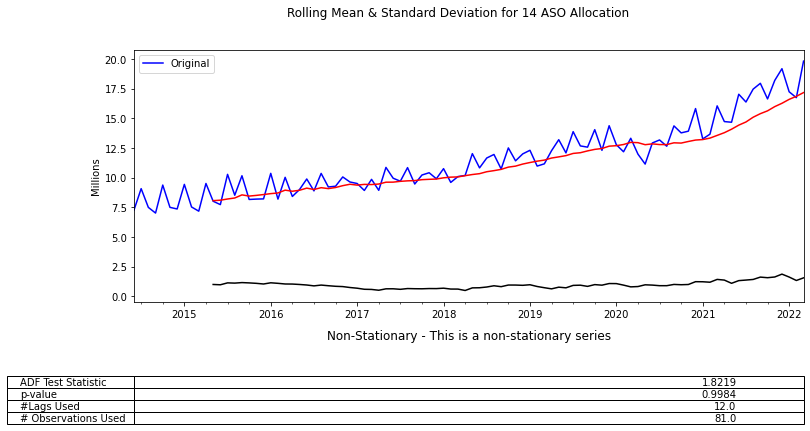

In [192]:
fig = stationarity_test(ts, maxlag=12, autolag=None)

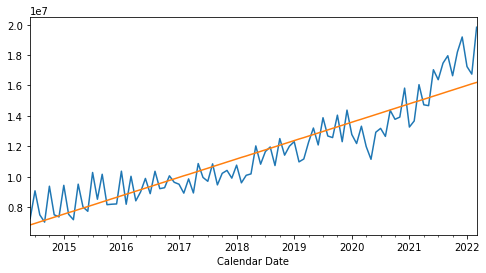

In [193]:
trend_14, lin_model_14 = get_trend(ts)

<AxesSubplot:label='b5aaa3cf-fb58-4769-baa3-77f9cec9f82f', xlabel='date'>

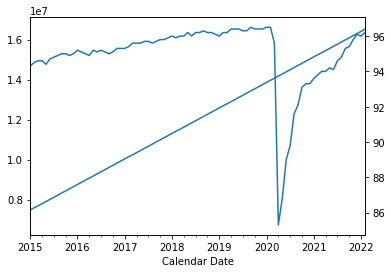

In [200]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
pd.Series(trend, index=ts.index).plot(ax=ax1)
(100-ts_unemp).plot(ax=ax2)

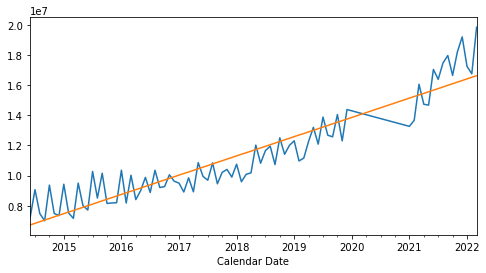

In [116]:
# Im training the trend model with the hole dataset, need no restrict to train data
trend_14, lin_model_14 = get_trend(ts[ts.index.year!=2020])

In [117]:
import datetime as dt
trend_14 = lin_model_14.predict(
    ts.reset_index()['Calendar Date'].dt.to_timestamp().map(dt.datetime.toordinal).values.reshape(-1, 1))

In [118]:
ts_notrend = ts-trend_14

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


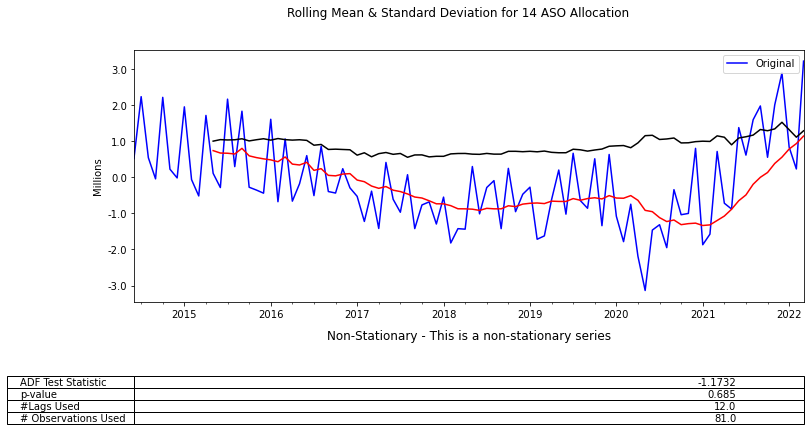

In [119]:
fig = stationarity_test(ts_notrend, maxlag=12, autolag=None)

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


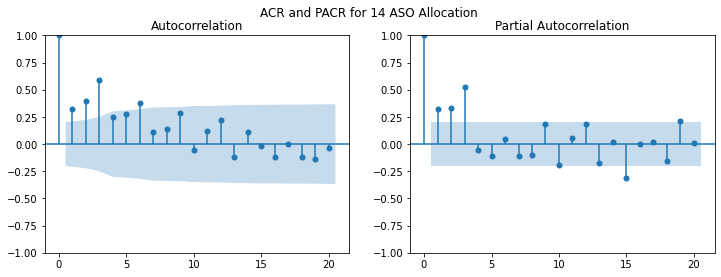

In [120]:
fig = autocorrelation_test(ts_notrend)

In [121]:
def create_lags(ts, n_lags):

    ts_list = [ts]
    for l in range(n_lags):
        ts_lag = ts.shift(periods=l+1).rename("lag_{}".format(l+1))
        ts_list.append(ts_lag)

    df = pd.concat(ts_list, axis=1)
    return df

In [133]:
df_14 =  create_lags(ts_notrend, 12)
df_14 = df_14.dropna()
df_14

,14 ASO Allocation,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Calendar Date,,,,,,,,,,,,,
2015-06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04,5.404420e+05,2.230325e+06,5.192625e+05
2015-07,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04,5.404420e+05,2.230325e+06
2015-08,2.934529e+05,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04,5.404420e+05
2015-09,1.827847e+06,2.934529e+05,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04
2015-10,-2.774162e+05,1.827847e+06,2.934529e+05,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11,2.004229e+06,5.515961e+05,1.972935e+06,1.591855e+06,6.120954e+05,1.373679e+06,-8.814663e+05,-7.205951e+05,7.125634e+05,-1.576742e+06,-1.869784e+06,7.992659e+05,-1.003443e+06
2021-12,2.888824e+06,2.004229e+06,5.515961e+05,1.972935e+06,1.591855e+06,6.120954e+05,1.373679e+06,-8.814663e+05,-7.205951e+05,7.125634e+05,-1.576742e+06,-1.869784e+06,7.992659e+05
2022-01,8.326466e+05,2.888824e+06,2.004229e+06,5.515961e+05,1.972935e+06,1.591855e+06,6.120954e+05,1.373679e+06,-8.814663e+05,-7.205951e+05,7.125634e+05,-1.576742e+06,-1.869784e+06


In [134]:
train_14 = df_14[df_14.index.year < 2021]
test_14 = df_14[df_14.index.year >= 2021]

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#model = RandomForestRegressor()
model = GradientBoostingRegressor()

In [149]:
train_14.loc[:,train_14.columns.values != '14 ASO Allocation']

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Calendar Date,,,,,,,,,,,,
2015-06,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04,5.404420e+05,2.230325e+06,5.192625e+05
2015-07,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04,5.404420e+05,2.230325e+06
2015-08,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04,5.404420e+05
2015-09,2.934529e+05,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06,-4.564694e+04
2015-10,1.827847e+06,2.934529e+05,2.161468e+06,-2.863571e+05,1.066509e+05,1.710399e+06,-5.184570e+05,-6.602959e+04,1.948242e+06,-1.953877e+04,2.223944e+05,2.211258e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,-1.315518e+06,-1.464019e+06,-3.136514e+06,-2.191421e+06,-7.469366e+05,-1.784184e+06,-1.082273e+06,6.295581e+05,-1.342576e+06,5.108085e+05,-8.597069e+05,-6.477871e+05
2020-09,-1.950592e+06,-1.315518e+06,-1.464019e+06,-3.136514e+06,-2.191421e+06,-7.469366e+05,-1.784184e+06,-1.082273e+06,6.295581e+05,-1.342576e+06,5.108085e+05,-8.597069e+05
2020-10,-3.446006e+05,-1.950592e+06,-1.315518e+06,-1.464019e+06,-3.136514e+06,-2.191421e+06,-7.469366e+05,-1.784184e+06,-1.082273e+06,6.295581e+05,-1.342576e+06,5.108085e+05


In [150]:
model.fit(train_14.loc[:,train_14.columns.values != '14 ASO Allocation'],
          train_14['14 ASO Allocation'])

GradientBoostingRegressor()

In [152]:
pred_14 = model.predict(test_14.loc[:,train_14.columns.values != '14 ASO Allocation'])

In [153]:
pred_14_adj = pred_14 + trend_14[-15:]

In [154]:
pred_14_adj = pd.Series(pred_14_adj, test_14.index)

<AxesSubplot:xlabel='Calendar Date'>

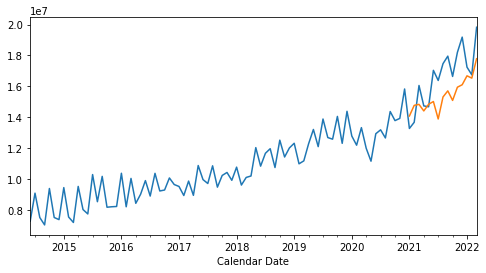

In [155]:
fig, ax = plt.subplots(figsize=(8,4))
ts.plot(ax=ax)
pred_14_adj.plot(ax=ax)

In [141]:
model.feature_importances_

array([0.19147425, 0.36203047, 0.44649528])

In [204]:
def create_sql_statement(country_var, dep_var, feat_vars, table_name, start_dt, end_dt):
    sql_query = "SELECT ROW_NUMBER() OVER(ORDER BY [File Date]) AS Series\n"
    sql_query = sql_query+",[File Date]\n"
    sql_query = sql_query+",CAST(SUBSTRING([File Date],1,4) AS INT) AS Year\n"
    sql_query = sql_query+",CAST(SUBSTRING([File Date],5,2) AS INT) AS Month\n"
    sql_query = sql_query+",["+dep_var+"]\n"
    for f in feat_vars:
        if f not in ["Series","Year","Month",dep_var]:
            sql_query = sql_query+",["+f+"]\n"
    sql_query = sql_query+"FROM "+table_name+"\n"
    sql_query = sql_query+"WHERE [Country] = '"+country_var+"'\n"
    sql_query = sql_query+"AND [File Date] BETWEEN '"+start_dt+"' AND '"+end_dt+"'\n"
    sql_query = sql_query+"ORDER BY [File Date]"
    return sql_query

In [206]:
print(create_sql_statement('MEX', 'dep', ['var1', 'var2'], 'tabla', '20160101', '20160601'))

SELECT ROW_NUMBER() OVER(ORDER BY [File Date]) AS Series
,[File Date]
,CAST(SUBSTRING([File Date],1,4) AS INT) AS Year
,CAST(SUBSTRING([File Date],5,2) AS INT) AS Month
,[dep]
,[var1]
,[var2]
FROM tabla
WHERE [Country] = 'MEX'
AND [File Date] BETWEEN '20160101' AND '20160601'
ORDER BY [File Date]


In [ ]:
get_data(country_var, dep_var, feat_vars, table_name, start_train, end_test)

In [ ]:
    elif pred_mode == 4:
start_dt = str(int(start_dt[0:4])-4)+start_dt[4:8]
end_dt = str(int(end_dt[0:4])-1)+end_dt[4:8]
sql_query = create_sql_statement(country_var, dep_var, feat_vars, table_name, start_dt, end_dt)
df = pd.read_sql(sql_query, con = conn)
comb_data = df.iloc[:,4:]
comb_data2= comb_data.rolling(12).mean()
comb_data3=comb_data2.iloc[-12:].reset_index(drop=True)
df['Year'] = df['Year'].astype(int) + 1
df['File Date'] = df['Year'].astype(str) + df['File Date'].str.slice(4,8)
df1 = df.iloc[:12 ,:1].reset_index(drop=True)
df = df.iloc[-12: ,1:4].reset_index(drop=True)
df= pd.concat([df1, df , comb_data3], axis=1)
